# Preparation

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
original = pd.read_csv('salaries_cyber.csv')

In [3]:
original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


Business Problem:
- Trying to see differences in salaries within Cyber Security field.

Feature Dictionary:

- work_year : Year the data was recorded
- experience_level : Job experience level (Entry-EN, Mid-MI, Senior-SE, Executive-EX)
- employment_type : Type of employment (Part-time-PT, full-time-FT, contract-CT, freelance-FL)
- job_title : Specific role
- salary : gross amount payed
- salary_currency : currency of salary (ISO 4217 currency code)
- salary_in_usd : salary in dollars
- employee_residence : Country of employee residence
- remote_ratio : Amount of remote work in a percentage (0% means no remote work, 50% means some remote work, 100% means job was fully remote)
- company_location : Country of company.
- company_size : Size of company (small, medium, or large)

# Data Prep

In [5]:
df = original.copy()

## Missing Values

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values

## Duplicates

In [7]:
df.duplicated().sum()

85

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

85 duplicate rows were removed

## Consistent/Correct Values
Only salary columns were changed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1162 non-null   int64 
 1   experience_level    1162 non-null   object
 2   employment_type     1162 non-null   object
 3   job_title           1162 non-null   object
 4   salary              1162 non-null   int64 
 5   salary_currency     1162 non-null   object
 6   salary_in_usd       1162 non-null   int64 
 7   employee_residence  1162 non-null   object
 8   remote_ratio        1162 non-null   int64 
 9   company_location    1162 non-null   object
 10  company_size        1162 non-null   object
dtypes: int64(4), object(7)
memory usage: 108.9+ KB


In [11]:
df['work_year'].value_counts()

2022    504
2021    475
2020    183
Name: work_year, dtype: int64

- Data was collected in the last three years

In [12]:
df['experience_level'].value_counts()

SE    488
MI    392
EN    210
EX     72
Name: experience_level, dtype: int64

- SE = Senior-level | MI = Mid-level | EN = Entry-Level | EX = Executive_level

In [13]:
df['employment_type'].value_counts()

FT    1140
CT      11
PT       8
FL       3
Name: employment_type, dtype: int64

- FT = Full-time | CT = Contract | PT = Part-time | FL = Freelance

In [14]:
df['job_title'].value_counts()

Security Engineer                          144
Cyber Security Analyst                     130
Penetration Tester                          68
Cyber Security Engineer                     63
Information Security Manager                62
                                          ... 
Principal Application Security Engineer      1
Application Security Specialist              1
Information Security Compliance Analyst      1
Application Security Architect               1
Concierge Security Engineer                  1
Name: job_title, Length: 87, dtype: int64

In [16]:
df['salary_currency'].value_counts()

USD    849
EUR    127
GBP     56
CAD     39
INR     23
AUD     18
BRL     12
CHF      9
NZD      5
PLN      4
DKK      4
ZAR      3
SEK      3
ILS      2
SGD      2
NOK      1
IDR      1
MXN      1
HUF      1
TWD      1
RUB      1
Name: salary_currency, dtype: int64

Verified all currency codes:
- USD = US Dollar
- EUR = Euro
- GBP = British Pound, Sterling
- CAD = Canada Dollar
- INR = India Rupee
- AUD = Australian Dollar
- BRL = Brazilian Real
- CHF = Frank
- NZD = New Zealand Dollar
- PLN = Poland Zloty
- DKK = Danish Krone
- ZAR = South Africa Rand
- SEK = Sweden Krona
- ILS = Israel Shekel
- SGD = Singapore Dollar
- NOK = Norway Kroner
- IDR = Indonesia Rupiah
- MXN = Mexican Peso
- HUF = Hungary Forint
- TWD = Taiwan Dollar
- RUB = Russian Ruble

In [18]:
df['employee_residence'].value_counts()

US    781
GB     57
CA     49
DE     35
IN     30
FR     22
AU     21
NL     13
BR     13
CH     12
ES     12
PT     11
IT      8
IE      6
GR      6
PL      5
NZ      5
SE      4
SI      4
RO      4
AR      4
DK      4
ZA      3
AF      3
BE      3
AE      3
SG      3
BG      2
AT      2
EE      2
RU      2
JP      2
HU      2
IL      2
TW      2
DZ      2
PK      2
IR      1
BW      1
LT      1
SA      1
VN      1
EG      1
LU      1
CL      1
GH      1
AZ      1
MX      1
KE      1
KG      1
ID      1
CZ      1
NO      1
NG      1
HR      1
ET      1
CR      1
TR      1
Name: employee_residence, dtype: int64

In [19]:
df['remote_ratio'].value_counts()

100    706
50     242
0      214
Name: remote_ratio, dtype: int64

In [20]:
df['company_location'].value_counts()

US    804
GB     57
CA     45
DE     33
IN     23
AU     20
FR     19
CH     14
NL     13
BR     12
ES     11
IT      8
PT      8
DK      6
PL      5
GR      5
NZ      5
IE      5
RO      4
RU      4
SI      4
SE      4
SG      4
BE      3
AR      3
ZA      3
NO      3
IL      3
AT      2
EE      2
AF      2
HU      2
JP      2
AE      2
DZ      2
PK      1
BW      1
SA      1
VN      1
TW      1
EG      1
LU      1
UM      1
CL      1
AZ      1
MX      1
RS      1
KE      1
AQ      1
ID      1
CZ      1
AX      1
HR      1
ET      1
TR      1
Name: company_location, dtype: int64

In [21]:
df['company_size'].value_counts()

L    756
M    317
S     89
Name: company_size, dtype: int64

# Presentation

In [25]:
# I will create 3 dataframes for each unique year that the data was collected.
df['work_year'].value_counts()

2022    504
2021    475
2020    183
Name: work_year, dtype: int64

In [26]:
df_2022 = df.loc[df['work_year'] == 2022].copy()
df_2021 = df.loc[df['work_year'] == 2021].copy()
df_2020 = df.loc[df['work_year'] == 2020].copy()

In [83]:
df_2022 = df_2022.sort_values(by='salary_in_usd')
df_2021 = df_2021.sort_values(by='salary_in_usd')
df_2020 = df_2020.sort_values(by='salary_in_usd')

In [89]:
df_2020.tail(11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1184,2020,SE,FT,Cyber Security Architect,203000,USD,203000,US,50,US,L
1196,2020,SE,FT,Software Security Engineer,300000,AUD,206620,AU,100,US,L
1219,2020,EX,FT,Cyber Security Architect,190000,EUR,216690,FR,100,US,L
948,2020,SE,FT,Network and Security Engineer,240000,USD,240000,CA,100,US,L
1175,2020,SE,FT,Information Security Manager,252000,USD,252000,US,100,US,M
1207,2020,SE,FT,Security Incident Response Engineer,260000,USD,260000,US,100,US,L
890,2020,SE,FT,Cyber Security Engineer,272000,USD,272000,US,100,US,L
1098,2020,SE,FT,Cyber Security Researcher,250000,EUR,285118,DE,100,US,L
1160,2020,SE,FT,Security Engineer,300000,USD,300000,US,50,US,L
1241,2020,MI,FT,Ethical Hacker,356000,GBP,456621,GB,100,GB,L


## Top 10 Salaries by Year

In [96]:
def top_10(data, year):
    price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

    fig, ax = plt.subplots(figsize= (8,5))
    sns.set_style("darkgrid")

    sns.barplot(data=data.tail(11), y='job_title', x='salary_in_usd')
    plt.xticks(rotation=-80)
    plt.ylabel('Job Titles', fontsize=15)
    plt.xlim(left=0, right=data['salary_in_usd'].max())
    plt.xlabel('Salary in USD', fontsize=15)
    ax.xaxis.set_major_formatter(price_fmt)
    plt.title(f'Top 10 Highest Paid Cyber Security Jobs: {year}', fontsize=25);

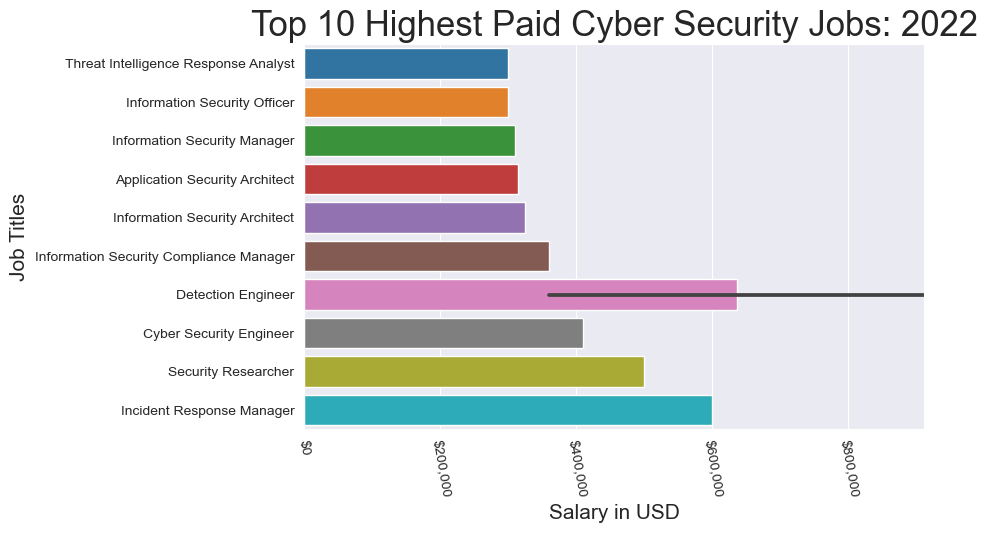

In [97]:
top_10(df_2022, '2022')

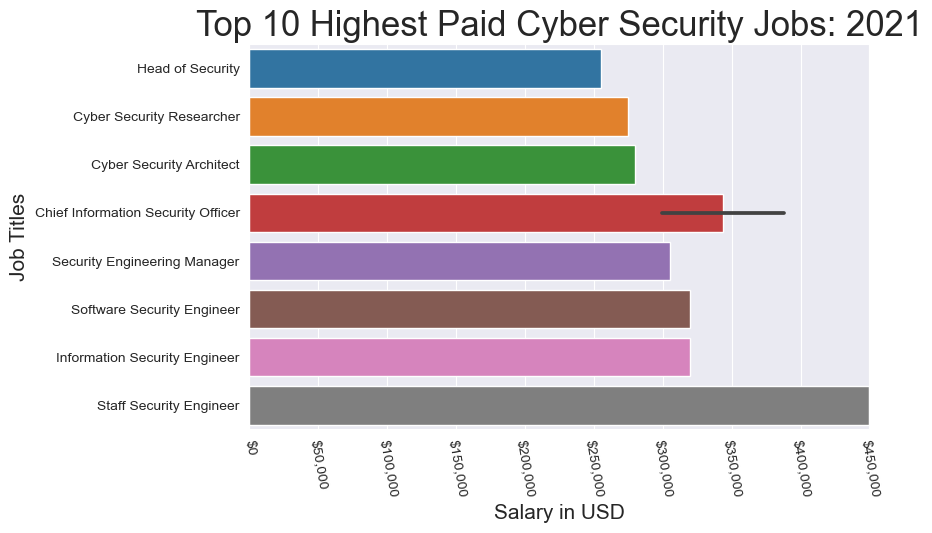

In [98]:
top_10(df_2021, '2021')

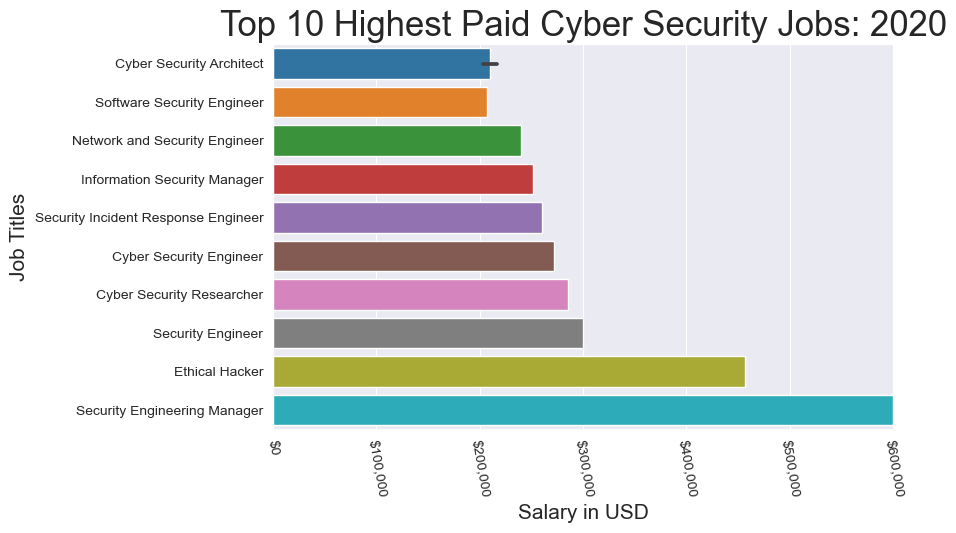

In [99]:
top_10(df_2020, '2020')